# 2025.01.22
### 광고비 예측 실습: 회귀모델

## set1 -- 환경 세팅, import

### import 모듈

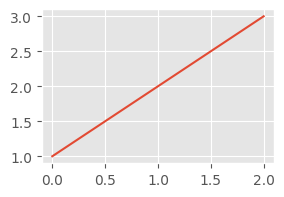

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))

pass

### read file 

In [2]:
# df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')
df = pd.read_csv('data/advertising.csv')

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### data frame info() 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## set2

### TV, Radio, Newspaper 시각화

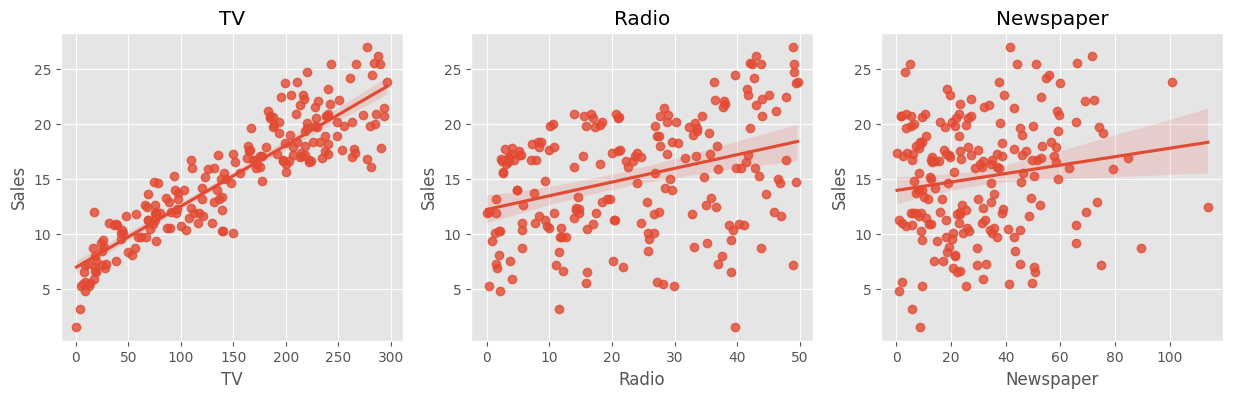

In [4]:
# TV 광고비에 따른 판매량
# 산점도
# sns.scatterplot(data=df, x="TV", y="Sales") 
# 산점도+회귀선
# sns.regplot(data=df, x="TV", y="Sales")

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.regplot(data=df, x="TV", y="Sales")
plt.title("TV")

plt.subplot(1,3,2)
sns.regplot(data=df, x="Radio", y="Sales")
plt.title("Radio")

plt.subplot(1,3,3)
sns.regplot(data=df, x="Newspaper", y="Sales")
plt.title("Newspaper")

# plt.show()
pass


### 상관계수  
Cmap 주소 
https://seaborn.pydata.org/tutorial/color_palettes.html 
https://matplotlib.org/stable/users/explain/colors/colormaps.html

<Axes: >

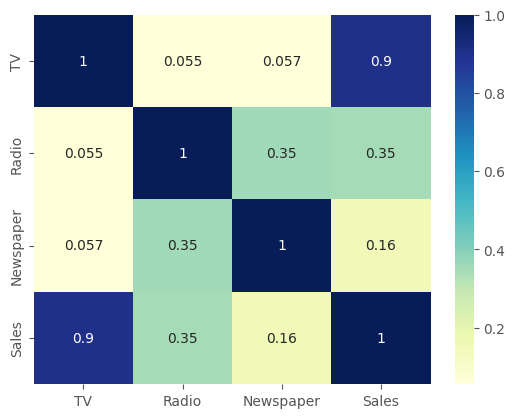

In [5]:
# 상관계수 히트맵 시각화
# 상관계수 출력 함수
# df.corr()
# df[['TV', 'Radio']].corr()

# # 
# a = sns.diverging_palette(145, 300, s=60, as_cmap=True)
# sns.heatmap(df.corr(),a, annot=True)
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

## set3

### 독립변수, 종속변수 선택 

In [6]:
X = df[["TV"]] # 독립변수는 2차원, 데이터 프레임 형태
y = df['Sales'] # 1차원, 시리즈 형태

### 훈련세트, 테스트세트 분할 
model_selection: 데이터 분할  
metrics: 평가 

In [7]:
# 함수 도움말 보기
# train_test_split?

In [8]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 1), (50, 1), (150,), (50,))

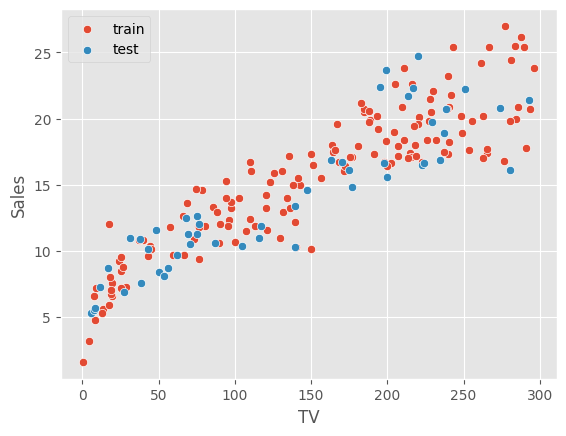

In [9]:
# 시각화 확인
sns.scatterplot(x=X_train['TV'], y=y_train, label='train')
sns.scatterplot(x=X_test['TV'], y=y_test, label='test')
# plt.legend()
pass

## set4

### 모델 생성 및 훈련  

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# model.fit(X=X_train, y=y_train)
model.fit(X_train, y_train)

LinearRegression()

### 평가 하기  
mean_squared_error: 분산  
root_mean_squared_error: 표준편차  
mean_absolute_error: 평균차절대값  
r2_score: 결정계수, 1에 가까울수록 오차가 적은 좋은 지표  
error: 오차  


In [11]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# 테스트 데이터의 예측값
pred = model.predict(X_test)
# print(pred)
# print(y_test)

# 예측값과 실제값의 차이(Loss/Error) 이용한 모델 평가
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'MSE : {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE : {mae:.2f}')
print(f'R2 : {r2:.2f}')


MSE : 5.51
RMSE: 2.35
MAE : 1.87
R2 : 0.80


### 실제값과 모델의 예측값 비교 

In [12]:
df_pred = pd.DataFrame({'X_test':X_test['TV'],
    'y_test':y_test,
    'y_pred':pred})
df_pred['error'] = df_pred['y_test']-df_pred['y_pred']
df_pred.head(10)

,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


### 수동 계산 

In [13]:
mae2 = abs(df_pred['error']).mean()
mse2 = np.square(df_pred['error']).mean()
rmse2 = np.sqrt(mse2)

# r2_score
# (실측값 - 예측값)^2의 합
# (실측값 - 실측값평균)^2의 합
rss = np.square(df_pred['y_test'] - df_pred['y_pred']).sum()
tss = np.square(df_pred['y_test'] - df_pred['y_test'].mean()).sum()
r22 = 1-(rss/tss)

print(f'MSE : {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE : {mae:.2f}')
print(f'R2 : {r2:.2f}')
print("="*30)
print(f'MSE : {mse2:.2f}')
print(f'RMSE: {rmse2:.2f}')
print(f'MAE : {mae2:.2f}')
print(f'R2 : {r22:.2f}')


MSE : 5.51
RMSE: 2.35
MAE : 1.87
R2 : 0.80
MSE : 5.51
RMSE: 2.35
MAE : 1.87
R2 : 0.80


### 모델의 학습 결과  
y = wx + b  
w: 회귀 계수, 기울기  
b: 절편

In [14]:
# 회귀 계수: 기울기
# 학습을 여러개로 하면 학습한 데이터만큼 회귀계수 생성되기 때문에 배열 리턴
w = model.coef_
print('회귀계수:', w)
# print(type(w))

# 절편
b = model.intercept_
print("절편:", b)
# print(type(b))

#회귀식
print(f"{w[0]:.5f} * TV + {b:.5f}")

회귀계수: [0.05538653]
절편: 7.098853680118275
0.05539 * TV + 7.09885


### 시각화 

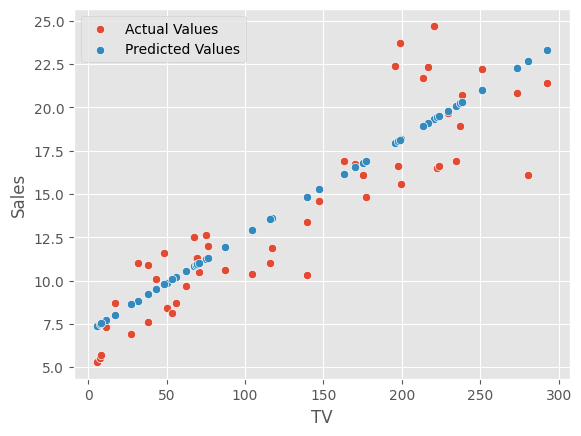

In [15]:
sns.scatterplot(x=X_test["TV"], y=y_test, label="Actual Values")
sns.scatterplot(x=X_test["TV"], y=pred, label="Predicted Values")
pass

### dd  
y_test의 인덱스가 섞여있어서 넘파이로 변경 후 출력


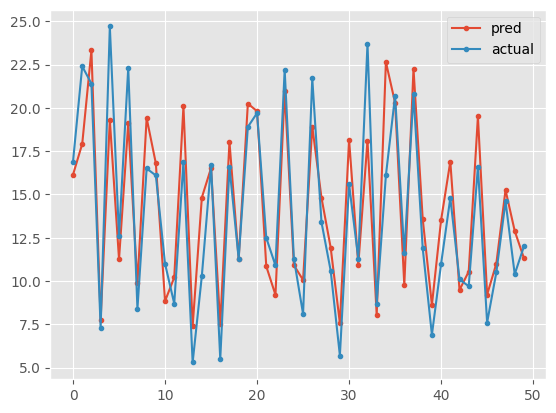

In [16]:
plt.plot(pred, marker='.', label='pred')
plt.plot(np.array(y_test), marker='.', label='actual')
plt.legend()

### 새로운 값 예측하기  

In [29]:
# TV 광고비 입력받기
TV = 500

# 예측 함수 사용하여 예측
print(model.predict([[TV]]))

print(w * TV + b)

[34.79211911]
[34.79211911]


C:\Users\hijig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## set5 -- 다중회귀

### 다중 회귀

In [18]:
X2 = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

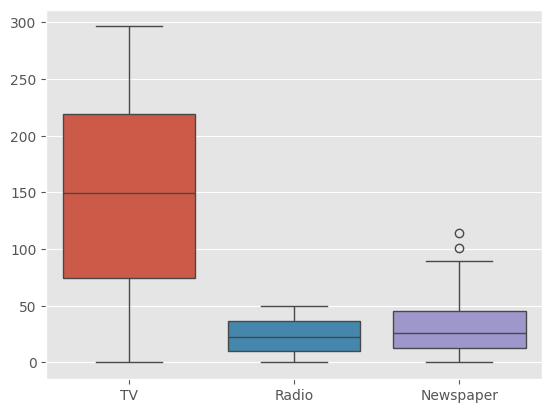

In [19]:
# 독립변수의 데이터 분포 파악

sns.boxplot(X2)
pass

### 독립변수 스케일링


In [20]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()

# scaler.fit(X2)
# X2_scaled = scaler.transform(X2)
X2_scaled = scaler.fit_transform(X2)
print(X2_scaled.shape)

scaled_TV = X2_scaled[:,0]
scaled_Radio = X2_scaled[:,1]
scaled_Newspaper = X2_scaled[:,2]

print(f"{scaled_TV.mean()}, {scaled_Radio.mean()}, {scaled_Newspaper.mean()}")
print(f"{scaled_TV.std()}, {scaled_Radio.std()}, {scaled_Newspaper.std()}")

# print(f"{scaled_TV.max()}, {scaled_Radio.max()}, {scaled_Newspaper.max()}")
# print(f"{scaled_TV.min()}, {scaled_Radio.min()}, {scaled_Newspaper.min()}")

# sns.boxplot(X2_scaled)
pass

(200, 3)
1.2212453270876723e-16, -4.529709940470639e-16, 2.220446049250313e-16
1.0, 1.0, 0.9999999999999999


### 훈련 및 평가

In [21]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test =train_test_split(X2_scaled, y, random_state=42)

print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(150, 3) (50, 3) (150,) (50,)


In [22]:
from sklearn.linear_model import LinearRegression

# 빈 모델 생성
model2 = LinearRegression()

# 모델 학습
model2.fit(X2_train, y2_train)

LinearRegression()

### 성능 평가 

In [23]:
pred2 = model2.predict(X2_test)

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y2_test, pred2)
rmse = root_mean_squared_error(y2_test, pred2)
mae = mean_absolute_error(y2_test, pred2)
r2 = r2_score(y2_test, pred2)

print(f"""
MSE: {mse:.2f}
RMSE: {rmse:.2f}
MAE: {mae:.2f}
R2: {r2:.2f}
""")


MSE: 2.40
RMSE: 1.55
MAE: 1.12
R2: 0.91



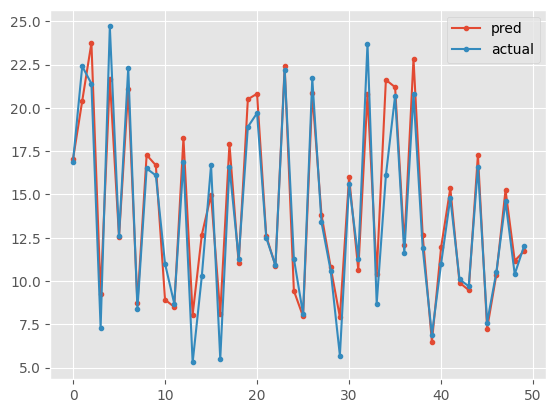

In [24]:
plt.plot(pred2, marker='.', label='pred')
plt.plot(np.array(y2_test), marker='.', label='actual')
plt.legend()

pass

### 학습 결과

In [25]:
print(f'회귀계수: {model2.coef_}')
print(f'회귀계수: {model2.intercept_}')

# 회귀식
print(f'{model2.coef_[0]} * TV + {model2.coef_[1]} * Radio + {model2.coef_[2]} * Newspaper + {model2.intercept_}')


회귀계수: [4.67709227 1.4774023  0.09352121]
회귀계수: 15.22473459736965
4.677092268978724 * TV + 1.4774023036363388 * Radio + 0.0935212124232997 * Newspaper + 15.22473459736965


### 값 예측  
X2_scaled = scaler.fit_transform(X2)

In [26]:
# 예측할 값
new_data = [[175, 15, 2]]

# 앞서 정규화 변환한 부분 적용
new_data_scaled = scaler.transform(new_data)
model2.predict(new_data_scaled)


C:\Users\hijig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([15.80426509])

## set 6 -- 다항회귀

(150, 220) (50, 220) (150,) (50,)
train score 1.0
test score -14619695.462744264


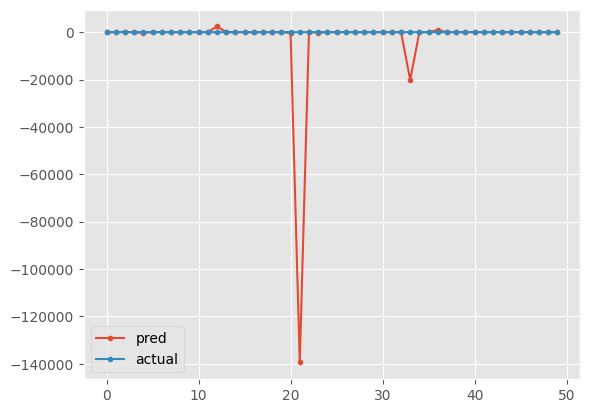

In [27]:
# 다항식 조합 생성
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9)

X_poly = poly.fit_transform(X2)
X_poly.shape

# 스케일링
scaler_poly = StandardScaler()
X_poly_scaled = scaler_poly.fit_transform(X_poly)

# 훈련세트, 테스트세트 분할
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly_scaled, y, random_state=42)
print(X_poly_train.shape, X_poly_test.shape, y_poly_train.shape, y_poly_test.shape)

# 모델 생성 및 학습
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_poly_train)

# 평가(r2_score)
# train이 test보다 과하게 크면 과적합 degree가 4 이상일 때 부터
print("train score", model_poly.score(X_poly_train, y_poly_train))
print("test score", model_poly.score(X_poly_test, y_poly_test))

pred3 = model_poly.predict(X_poly_test)
plt.plot(pred3, marker='.', label='pred')
plt.plot(np.array(y_poly_test), marker='.', label='actual')
plt.legend()
pass

### -- 

train score 0.9217490452368416
test score 0.9482128006009242


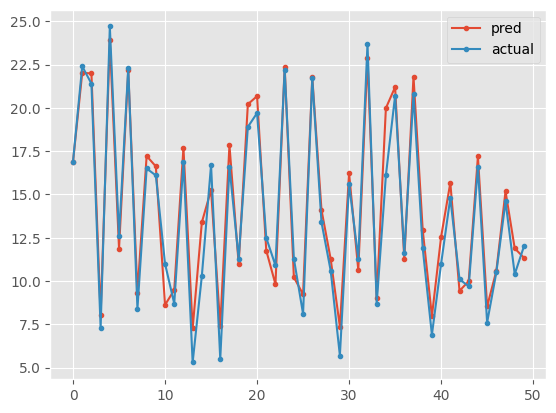

In [28]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# 모델 생성 및 학습
# model_poly = Ridge(alpha=10)
model_poly = Lasso(alpha=0.1)
model_poly.fit(X_poly_train, y_poly_train)

# 평가(r2_score)
# train이 test보다 과하게 크면 과적합 degree가 4 이상일 때 부터
print("train score", model_poly.score(X_poly_train, y_poly_train))
print("test score", model_poly.score(X_poly_test, y_poly_test))

pred3 = model_poly.predict(X_poly_test)
plt.plot(pred3, marker='.', label='pred')
plt.plot(np.array(y_poly_test), marker='.', label='actual')
plt.legend()
pass